In [1]:
import numpy as np
import changes_coords as chc
import random
import PharmHash as ph
import re

In [2]:
def save_to_xyz(self, fname, feature_ids=None):
    """
    Save pharmacophoe to xyz format
    :param fname: xyz-file name
    :return: nothing
    """
    with open(fname, 'wt') as f:
        f.write('\n')
        f.write(f'bin_step={self.get_bin_step()}\n')
        for i, (x, y, z) in self.get_feature_coords(feature_ids):
            f.write(f'{i} {x} {y} {z}\n')

In [3]:
def load_from_pma(self, fname):
    """
    Reads pharmacophore from a pma-file.
    :param fname: pma-file name
    :return: nothing
    """
    with open(fname) as f:
        d = json.loads(f.readline().strip())
        feature_coords = tuple((feature[0], tuple(feature[1])) for feature in d['feature_coords'])
        self.load_from_feature_coords(feature_coords)
        self.update(d['bin_step'])

def load_from_xyz(self, fname):
    """
    Reads pharmacophore from xyz-file.
    :param fname: xyz-file name
    :return: nothing
    """
    with open(fname) as f:
        feature_coords = []
        f.readline()
        line = f.readline().strip()
        if line:
            opts = dict(item.split('=') for item in line.split(';'))
            if 'bin_step' in opts:
                self.update(bin_step=float(opts['bin_step']))
        for line in f:
            label, *coords = line.strip().split()
            coords = tuple(map(float, coords))
            feature_coords.append((label, coords))
        self.load_from_feature_coords(tuple(feature_coords))


In [4]:
def load_from_coords(fname):
    """
    Reads pharmacophore from xyz-file.
    :param fname: xyz-file name
    :return: dictionary of coords
    """
    dic = {}

    with open (fname) as f:
        feature_coords = []
        for line in f:       
            line = line.strip().split()
            if not line:
                dic[name] = tuple(feature_coords)
                feature_coords = []
            elif len(line) == 1:  
                name = line[0]
            else:    
                label, *coords = line
                coords = tuple(map(float, coords))
                feature_coords.append((label, coords))
    return dic
            

In [5]:
def load_rmsd(fname):
    dic = {}
    with open (fname) as f:
        for line in f:
            line  = line.strip().split()
            dic[line[0]+'_'+line[1]] = float(line[2])
    return dic

In [6]:
RMSD = load_rmsd('confs_4386_mirror.rms')
ph_coords = load_from_coords('confs_4386.coords')


In [71]:
rnd_crd = random.choice(list(ph_coords.keys())) # get random pharmacophore
similiar = [name for name in ph_coords.keys() if re.search(rnd_crd[:-2], name)]  # find all similiar pharmacophores
print(f"Pharmacophore: {rnd_crd}, RMSD: {RMSD[rnd_crd]}")
for crd in similiar:
    if ph.make_hash(ph_coords[crd], m = 2)[0] == ph.make_hash(ph_coords[rnd_crd], m = 2)[0]:
        if crd != rnd_crd:
            print(f"PH: {crd}, RMSD: {RMSD[crd]}")


Pharmacophore: DB06803_31, RMSD: 0.833
PH: DB06803_7, RMSD: 0.833
PH: DB06803_10, RMSD: 0.833
PH: DB06803_32, RMSD: 0.833
PH: DB06803_36, RMSD: 0.833
PH: DB06803_45, RMSD: 0.833
PH: DB06803_48, RMSD: 0.833


In [7]:
print(rnd_crd)
ph.make_hash(ph_coords[rnd_crd], m = 1)[0]

DB01139_13


(('a', (0.0, 0.0, -6.0)),
 ('H', (0.0, 0.0, -6.0)),
 ('H', (-1.0, -2.0, 8.0)),
 ('H', (1.0, -2.0, 2.0)),
 ('H', (-1.0, 0.0, -3.0)),
 ('A', (-1.0, 2.0, 1.0)),
 ('A', (0.0, 3.0, 3.0)),
 ('A', (0.0, 0.0, -8.0)),
 ('A', (1.0, 2.0, 5.0)),
 ('A', (2.0, -1.0, -2.0)),
 ('A', (1.0, -1.0, 8.0)),
 ('D', (1.0, -1.0, -1.0)),
 ('N', (0.0, 2.0, 4.0)))

In [12]:
anth_crd = random.choice(similiar)
print(anth_crd)
ph.make_hash(ph_coords[anth_crd], m = 1)[0]

DB01139_19


(('a', (0.0, -1.0, -6.0)),
 ('H', (0.0, -1.0, -6.0)),
 ('H', (1.0, -4.0, 6.0)),
 ('H', (-2.0, 0.0, 1.0)),
 ('H', (-1.0, 0.0, -3.0)),
 ('A', (0.0, 4.0, 2.0)),
 ('A', (1.0, 3.0, 4.0)),
 ('A', (1.0, -1.0, -7.0)),
 ('A', (1.0, 1.0, 5.0)),
 ('A', (1.0, 1.0, 0.0)),
 ('A', (-1.0, -3.0, 7.0)),
 ('D', (-1.0, 2.0, -1.0)),
 ('N', (1.0, 2.0, 5.0)))

In [14]:
ph.make_hash(ph_coords[rnd_crd], m = 1)[0] == ph.make_hash(ph_coords[anth_crd], m = 1)[0]

False

In [19]:
for crd in similiar:
    if ph.make_hash(ph_coords[crd], m = 0.5)[0] == ph.make_hash(ph_coords[rnd_crd], m = 0.5)[0]:
        print(crd)

DB00842_1
DB00842_2
DB00842_16
DB00842_21
DB00842_30
DB00842_31
DB00842_43


In [13]:
a[yy]

(('a', (1.8596207896868389, -0.6024596793577075, -0.19499941915273666)),
 ('A', (4.110487461090088, 0.7139492034912109, 0.7956511378288269)),
 ('A', (1.508716106414795, 1.802101492881775, 1.0790890455245972)),
 ('A', (-2.2468855381011963, -1.6089800596237183, 0.5154008865356445)),
 ('A', (1.05612313747406, 3.7438840866088867, -0.9122799038887024)),
 ('P', (-2.2468855381011963, -1.6089800596237183, 0.5154008865356445)),
 ('H', (1.8596207896868389, -0.6024596793577075, -0.19499941915273666)),
 ('H', (5.3995866775512695, 0.17737002670764923, 0.5376091599464417)),
 ('H', (-3.439227342605591, -2.443258285522461, 0.39313146471977234)))

In [14]:
a[xx]

(('a', (1.730240821838379, -0.43535576046754915, -0.3248649562398593)),
 ('A', (4.090847969055176, 0.7814775109291077, 0.5279315114021301)),
 ('A', (1.5465178489685059, 1.7089486122131348, 1.3794732093811035)),
 ('A', (-2.5013725757598877, -1.488167643547058, 0.8217523097991943)),
 ('A', (0.7711217403411865, 3.9666550159454346, -0.09968335926532745)),
 ('P', (-2.5013725757598877, -1.488167643547058, 0.8217523097991943)),
 ('H', (1.730240821838379, -0.43535576046754915, -0.3248649562398593)),
 ('H', (5.329258441925049, 0.3588978052139282, -0.02364392951130867)),
 ('H', (-3.0454084873199463, -2.82218074798584, 0.5812448859214783)))

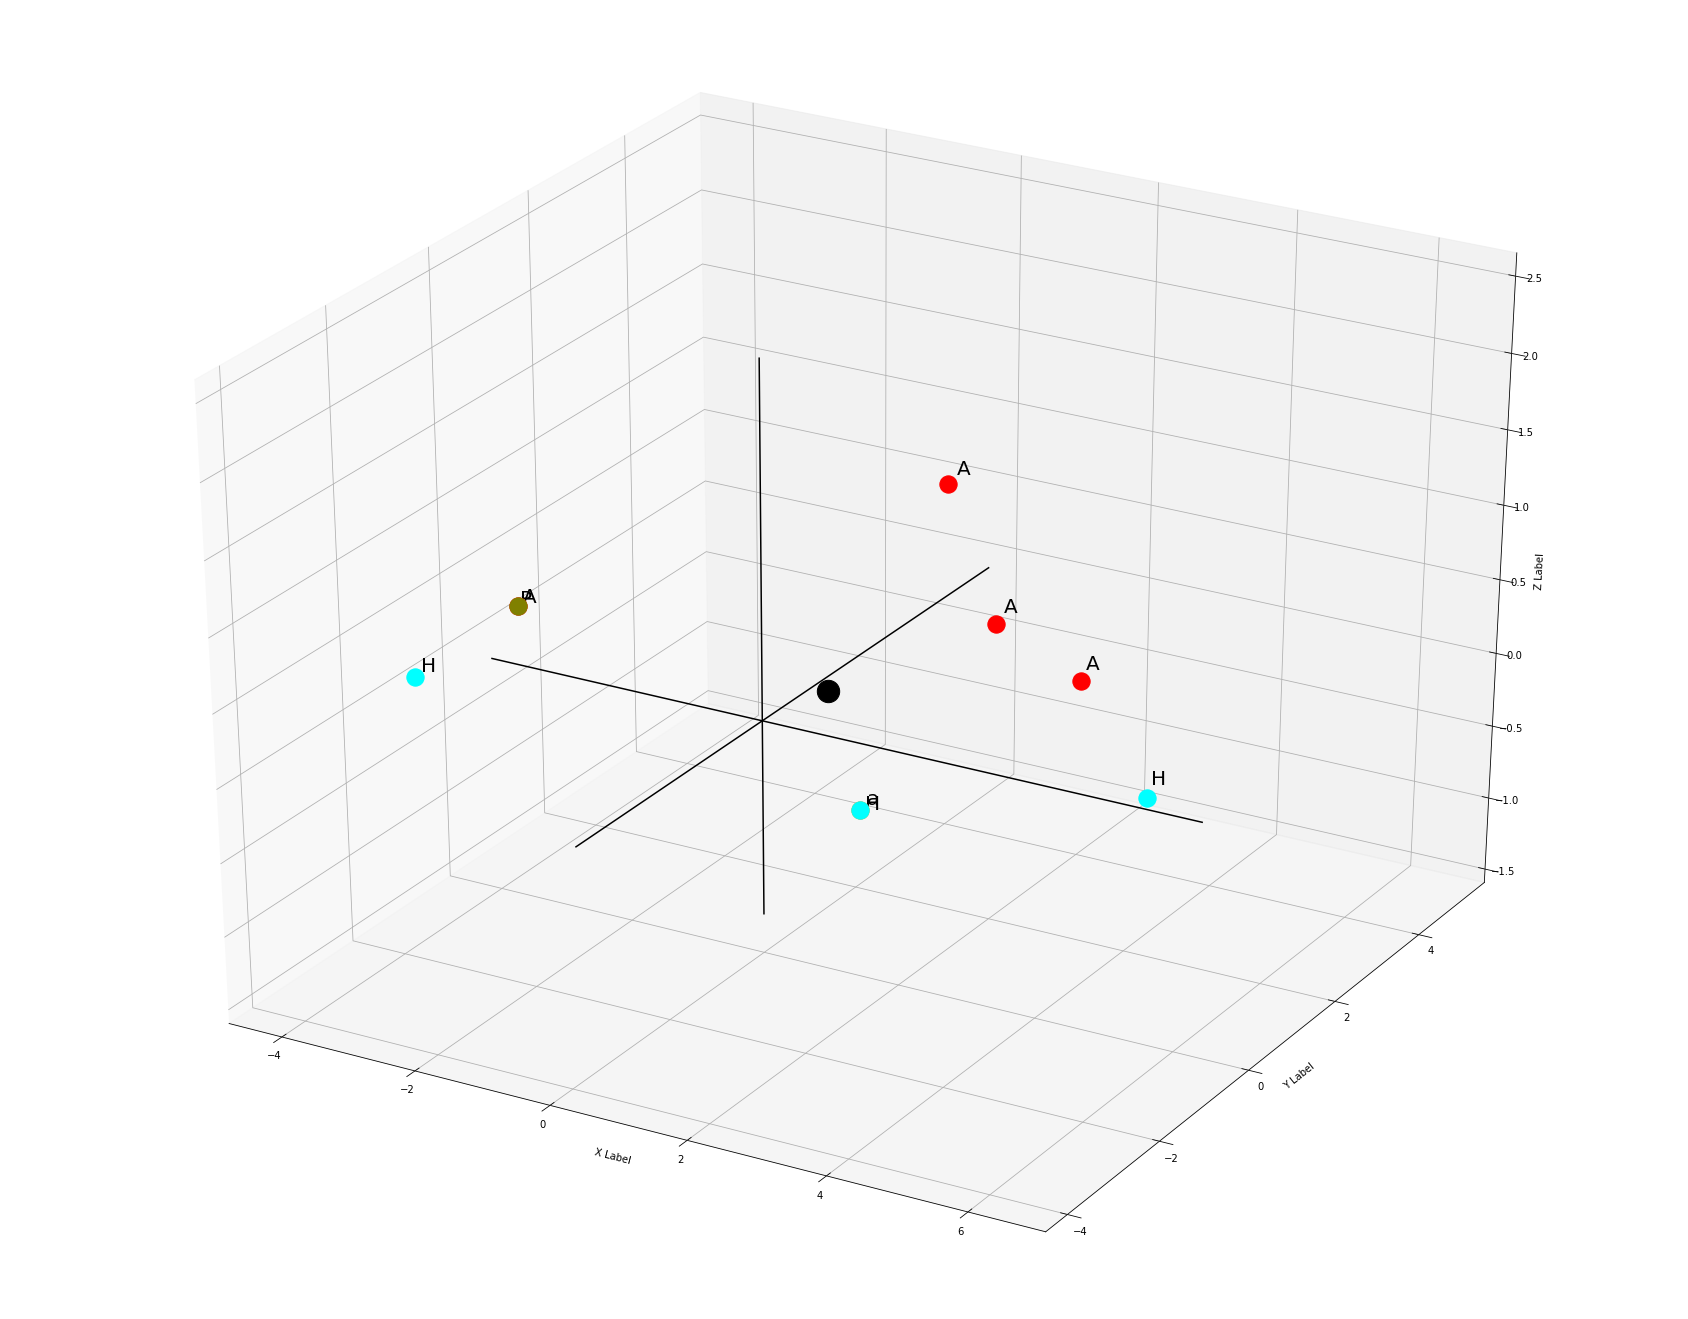

In [26]:
ph.view_ph(a[xx])

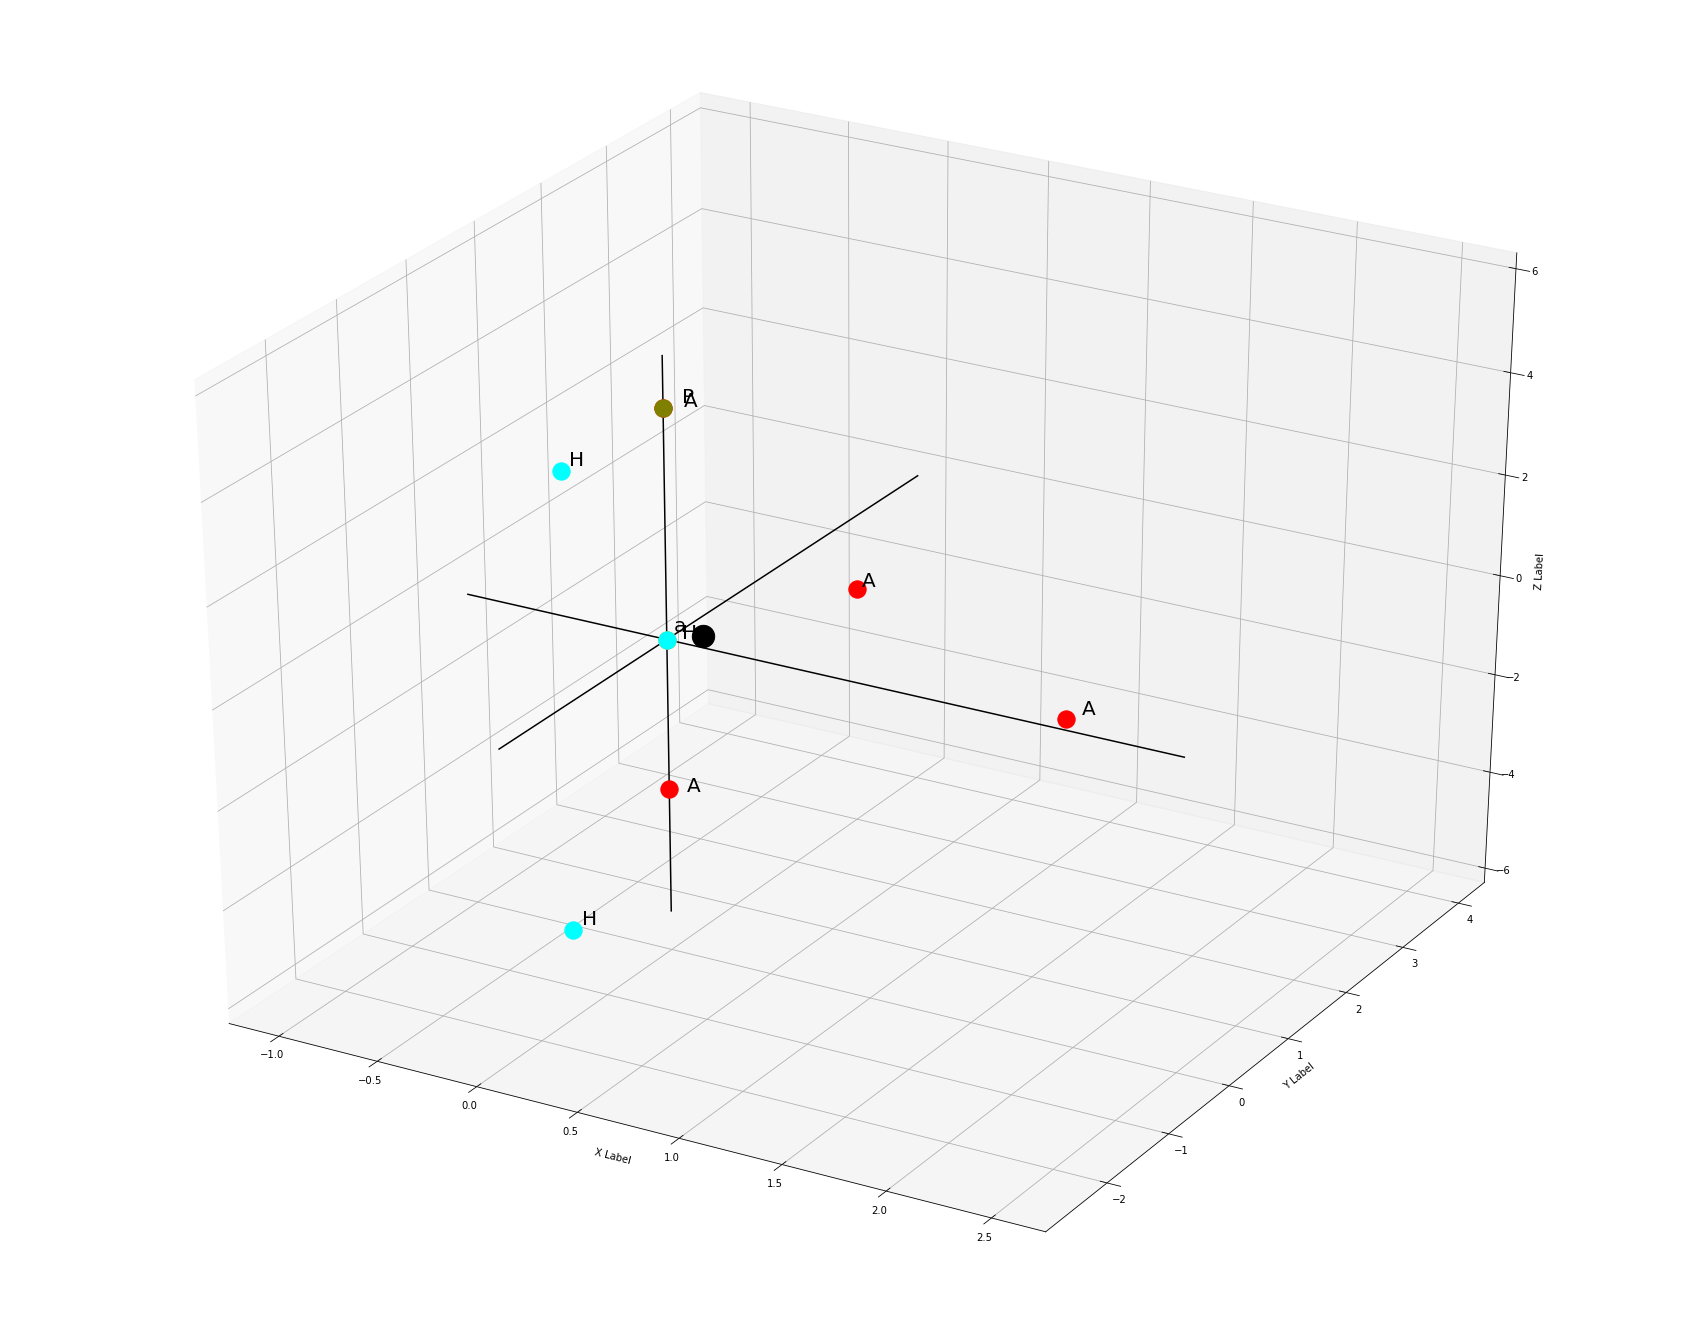

In [31]:
ph.view_ph(ph.make_hash(a[xx], m = 1.5)[0])